In [9]:

data = pd.read_csv('C:\\Users\\LENOVO THINKPAD W550\\Desktop\\general_practice\\train.csv')

# Print the first five rows of the data
print(data.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [12]:
import pandas as pd

# Load the CSV file into a DataFrame
house_data =  pd.read_csv('C:\\Users\\LENOVO THINKPAD W550\\Desktop\\general_practice\\train.csv')
# Extract the columns of interest
X = house_data[['GrLivArea', 'YearBuilt']]  # Explanatory variables
y = house_data['SalePrice']  # Objective variable


In [13]:
import pandas as pd

# Load the CSV file into a DataFrame
house_data = pd.read_csv('C:\\Users\\LENOVO THINKPAD W550\\Desktop\\general_practice\\train.csv')

# Extract the columns of interest
X = house_data[['GrLivArea', 'YearBuilt']]  # Explanatory variables
y = house_data['SalePrice']  # Objective variable

# Display the first 5 rows of the explanatory variables
print(X.head())

# Display the first 5 rows of the objective variable
print(y.head())


   GrLivArea  YearBuilt
0       1710       2003
1       1262       1976
2       1786       2001
3       1717       1915
4       2198       2000
0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


Mean Squared Error: 2495554898.6683216


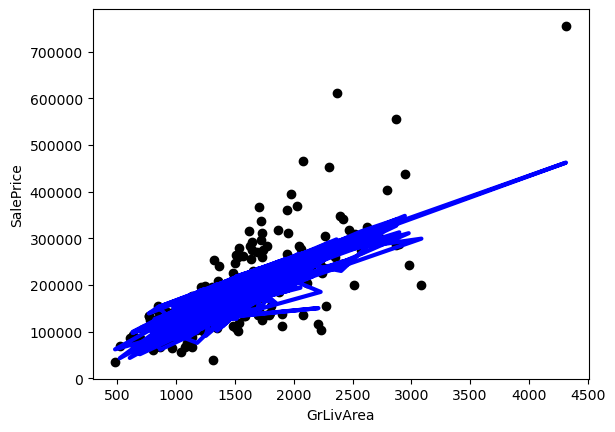

In [14]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
house_data = pd.read_csv('C:\\Users\\LENOVO THINKPAD W550\\Desktop\\general_practice\\train.csv')

# Extract the columns of interest
X = house_data[['GrLivArea', 'YearBuilt']]  # Explanatory variables
y = house_data['SalePrice']  # Objective variable

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Visualize the results
plt.scatter(X_test['GrLivArea'], y_test, color='black')
plt.plot(X_test['GrLivArea'], y_pred, color='blue', linewidth=3)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()


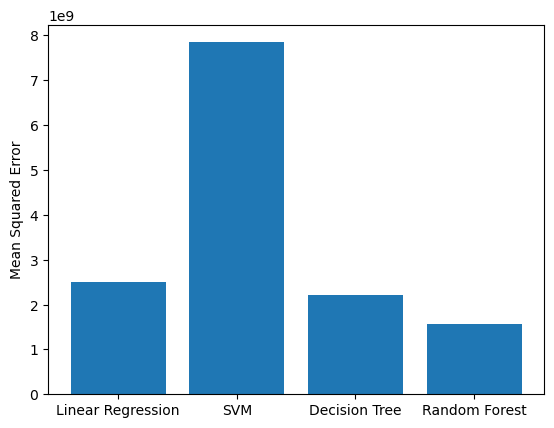

In [15]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
house_data = pd.read_csv('C:\\Users\\LENOVO THINKPAD W550\\Desktop\\general_practice\\train.csv')

# Extract the columns of interest
X = house_data[['GrLivArea', 'YearBuilt']]  # Explanatory variables
y = house_data['SalePrice']  # Objective variable

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a dictionary to store the results
results = {}

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
results['Linear Regression'] = mse_lr

# SVM
svm = SVR()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)
results['SVM'] = mse_svm

# Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
results['Decision Tree'] = mse_dt

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
results['Random Forest'] = mse_rf

# Visualize the results
plt.bar(results.keys(), results.values())
plt.ylabel('Mean Squared Error')
plt.show()


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load the data and extract the desired features and target variable
data = pd.read_csv('train.csv')
features = ['GrLivArea', 'YearBuilt', 'LotArea', 'OverallQual', 'OverallCond']
X = data[features]
y = data['SalePrice']

# Check for missing values and handle them appropriately
X.dropna(inplace=True)
y.dropna(inplace=True)

# Convert any categorical variables to numerical
# (Not needed in this example since all features are already numerical)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical features to have similar ranges
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model using the training set
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Evaluate the model using the testing set and appropriate metrics
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('R-squared:', r2)
print('MSE:', mse)


R-squared: 0.770254803995724
MSE: 1762220597.886941


C:\Users\LENOVO THINKPAD W550\AppData\Local\Temp\ipykernel_9784\3145427850.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)
